In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [18]:
matplotlib.rcParams['image.cmap'] = 'Greys_r'
matplotlib.rcParams['figure.figsize'] = [5,15]

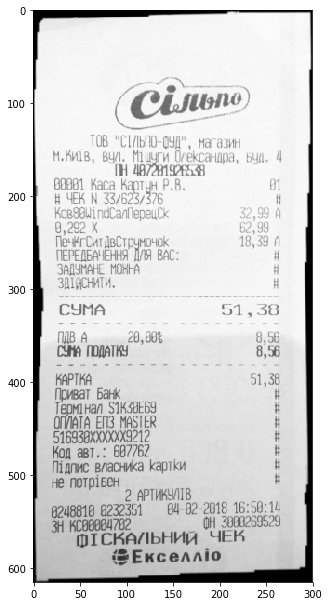

In [571]:
img = cv2.imread('../bills_cropped/4.jpg',0)
plt.imshow(img)

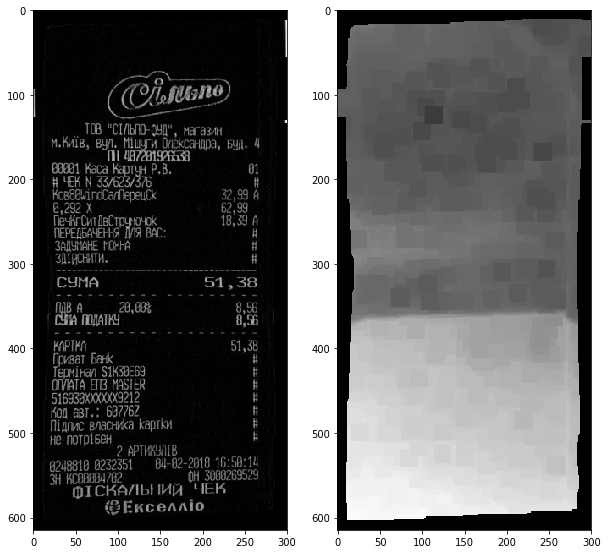

In [572]:
inv = 255 - img
inv[img==0] = 0
eroded = cv2.erode(inv,np.ones((5,5)),iterations=5)
# eroded = cv2.GaussianBlur(eroded,(25,5),5)
tuned = eroded+img

tuned[eroded==0] = 255

tuned = 255-tuned

tmp = cv2.medianBlur(
    cv2.erode(tuned,np.ones((1,5)))
    ,5)

res_img = (tuned.astype('int16') - tmp)

res_img[res_img<0] = 0
f,ax = plt.subplots(1,2,figsize=(10,15))
ax[0].imshow(res_img)
ax[1].imshow(eroded)

In [573]:
histo = res_img.sum(axis=1)
y = lambda x: histo[x]

In [574]:
population = np.random.randint(0,len(histo),len(histo))

pop_size = len(population)-1
for delta in range(10,0,-1):
    for i in range(100):
        population = set([min([max(0,p-delta),p,min(p+delta, pop_size)],key=y) for p in population])

population = sorted(list(population))

for i,j in zip(population[:-1],population[1:]):
    if (j-i) < 10:
        if i in population and j in population:
            population.remove(max([i,j],key=y))

In [575]:
line_centers = [(e+b)//2 for b,e in zip(population[:-1],population[1:])]

(0, 615)

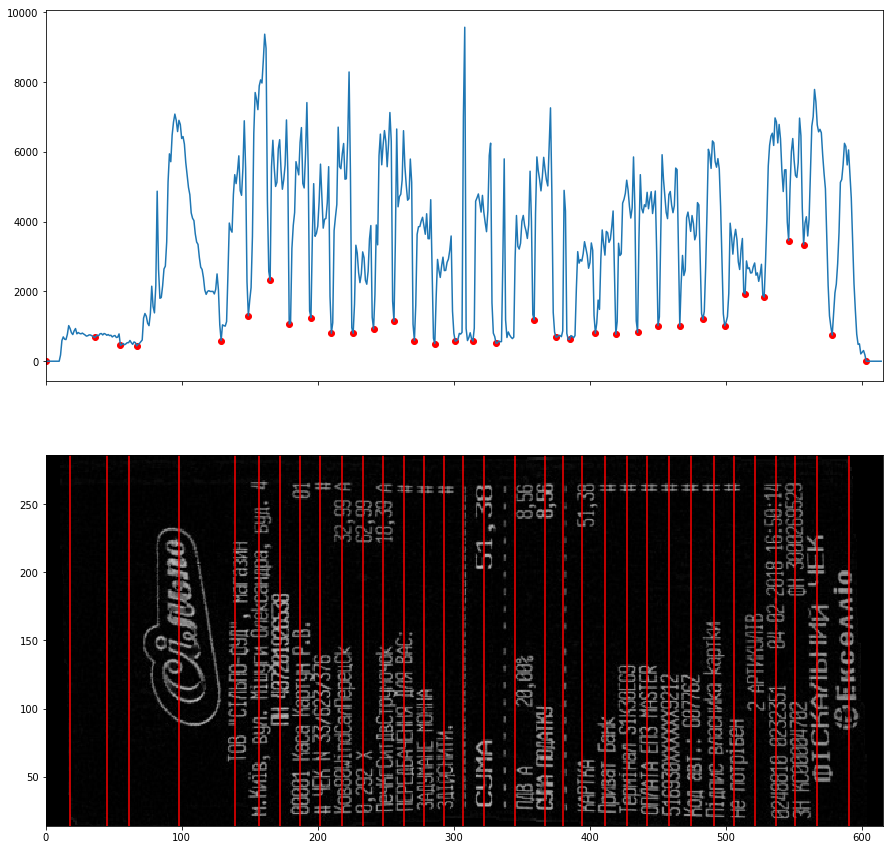

In [576]:
f,ax = plt.subplots(2,1,figsize=(15,15),sharex=True)
ax[0].plot(histo)
ax[0].scatter(population,[y(x) for x in population],c='r')
ax[1].imshow(res_img.T)
ax[1].vlines(line_centers,0,299,color='r')
ax[1].set_ylim(0,300)
ax[1].set_xlim(0,len(histo))

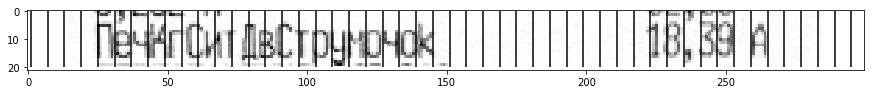

In [594]:
center = line_centers[11]
f,ax = plt.subplots(1,1,figsize=(15,5))
ax.imshow(250 - res_img[center-10:center+10,:])
ax.vlines(range(1,300,6),0,20)